## IPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}

Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
dim(df)

[1] 79541    10

In [6]:
Z = prcomp(df[,1:9], retx = TRUE)

In [7]:
dim(Z$x)

[1] 79541     9

## Classicial PCA

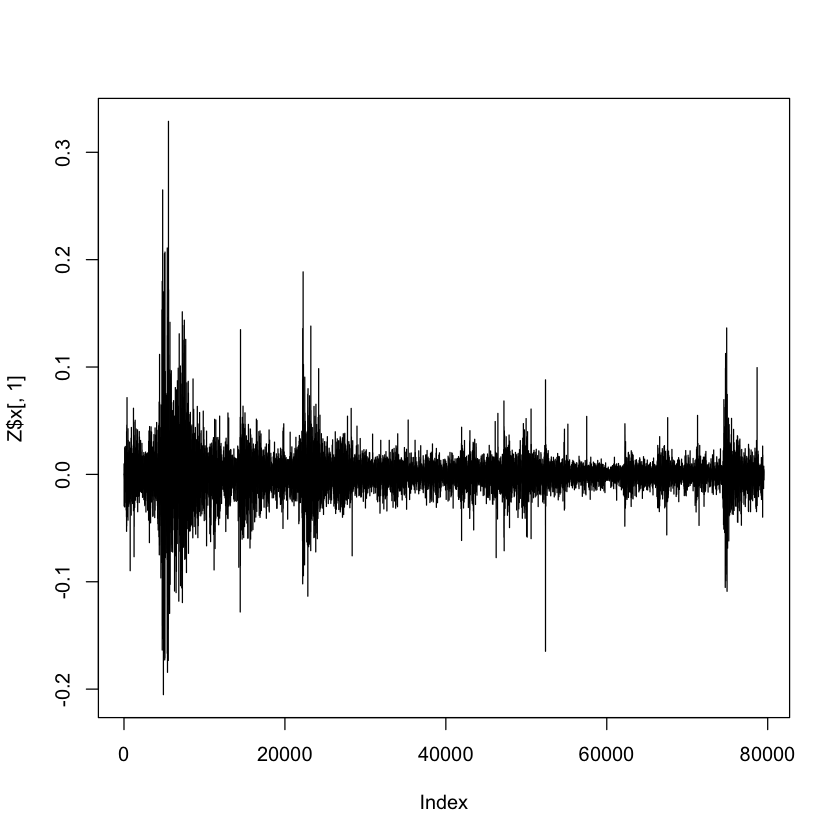

In [8]:
plot(Z$x[,1], type="l")

In [9]:
Z_periods_classical = c();
for (year in first_year:last_year) {
    startTime = sprintf("%s-01-01", year);
    endTime = sprintf("%s-12-31 23:59:59", year);
    subdf = df[df$Datetime >= startTime & df$Datetime <= endTime,];
    Z_period = prcomp(subdf[,1:9], retx = TRUE);
    Z_periods_classical = rbind(Z_periods_classical, as.matrix(Z_period$x));
}

In [10]:
dim(Z_periods_classical)

[1] 79541     9

In [11]:
source("xpca.R")

In [12]:
Z_periods_ipca = c();
W = NA;
for (year in first_year:last_year) {
    startTime = sprintf("%s-01-01", year);
    endTime = sprintf("%s-12-31 23:59:59", year);
    subdf = df[df$Datetime >= startTime & df$Datetime <= endTime,];
    result = ipca(as.matrix(subdf[,1:9]));
    Z_period = result$P;
    Z_periods_ipca = rbind(Z_periods_ipca, Z_period);
    W = result$W;
    if (year == 2008) {
        print(W);
    }
}

           PC1         PC2         PC3          PC4         PC5         PC6
DY  -0.1949333  0.14677107 -0.05385845  0.396659060  0.22333593 -0.02041072
ES  -0.2735027 -0.31046389 -0.12215871  0.132409790 -0.35915812 -0.15133904
EW  -0.2407860 -0.36198008 -0.15654228  0.005907479  0.08467385  0.88169936
FX  -0.4599837  0.36588933 -0.18347360  0.517920590  0.31030980 -0.04475384
MX  -0.4924515  0.52825941 -0.20192431 -0.573014895 -0.28927328  0.07864199
NQ  -0.1977001 -0.25510933 -0.11030744  0.142931048 -0.21983446 -0.16947659
RTY -0.2775390 -0.40599962 -0.20759346 -0.432736437  0.64176280 -0.33761774
X   -0.4228494 -0.07346378  0.90095334 -0.042981959  0.03995819  0.01033108
YM  -0.2832157 -0.32061575 -0.12749645  0.137727901 -0.41497265 -0.21973594
             PC7          PC8           PC9
DY  -0.054051095 -0.852504834  0.0154459235
ES   0.202248374 -0.010801921  0.7768102872
EW  -0.005082665  0.005997032 -0.0427427159
FX   0.079700937  0.497841415 -0.0119288512
MX  -0.064000824 -0.

In [13]:
tail(Z_periods_ipca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
81766,-0.0015313158,0.0009467625,4.267652e-04,0.0026887122,-9.426279e-05,-3.933871e-04,1.750362e-03,-5.690801e-05,-4.144853e-05
81767,0.0022569448,-0.0015715014,7.550132e-05,-0.0007078159,5.494060e-05,1.340751e-03,-3.025253e-05,1.555588e-05,8.595197e-05
81768,-0.0009771236,0.0007121904,-8.052731e-05,0.0001010713,2.587371e-05,-1.157255e-04,2.325291e-04,-2.054569e-06,1.178077e-04
81769,0.0042758994,-0.0029499242,1.460633e-04,-0.0011044947,5.502685e-05,4.657244e-04,1.276403e-03,3.538551e-05,1.351193e-04
81770,0.0013639375,-0.0004860317,-9.316048e-04,-0.0043951439,4.154473e-04,-7.057163e-06,2.250490e-03,6.191558e-05,1.676610e-04
81771,0.0027843367,-0.0021507926,5.338148e-04,0.0010235847,-1.666120e-04,4.973737e-04,-7.137736e-04,2.338782e-05,3.965092e-04


In [14]:
tail(Z_periods_classical)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
81766,-0.001612889,0.0009922508,4.292141e-04,0.0027224526,-7.276526e-05,-3.992579e-04,1.779136e-03,-5.136107e-05,-3.962004e-05
81767,0.002175372,-0.0015260130,7.795017e-05,-0.0006740755,7.643813e-05,1.334881e-03,-1.478550e-06,2.110281e-05,8.778046e-05
81768,-0.001058697,0.0007576787,-7.807847e-05,0.0001348116,4.737124e-05,-1.215963e-04,2.613031e-04,3.492363e-06,1.196361e-04
81769,0.004194326,-0.0029044358,1.485121e-04,-0.0010707543,7.652438e-05,4.598536e-04,1.305177e-03,4.093244e-05,1.369478e-04
81770,0.001282365,-0.0004405433,-9.291560e-04,-0.0043614035,4.369449e-04,-1.292795e-05,2.279264e-03,6.746252e-05,1.694895e-04
81771,0.002702764,-0.0021053043,5.362636e-04,0.0010573251,-1.451144e-04,4.915030e-04,-6.849996e-04,2.893475e-05,3.983377e-04


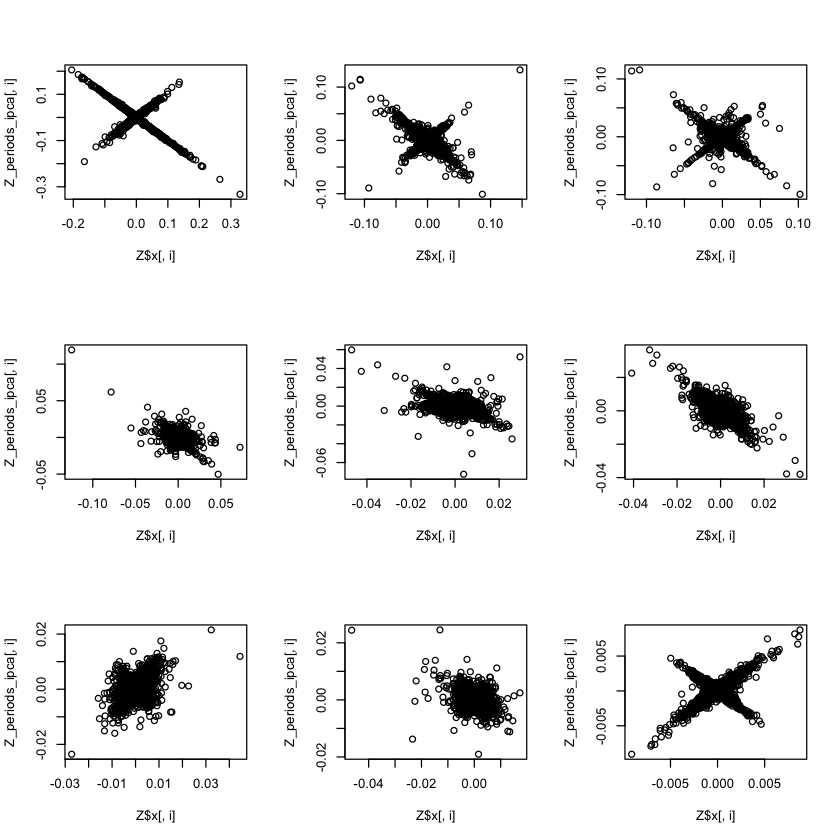

In [15]:

par(mfrow=c(3,3))
for (i in 1:9) {
    plot(Z$x[, i], Z_periods_ipca[, i])
}

In [16]:
max_iter_count = NA;
is.na(max_iter_count);

[1] TRUE